In [1]:
import numpy as np
import pandas as pd
import mplhep as hep
import matplotlib.pyplot as plt
from ftag.hdf5 import H5Reader

In [2]:
fname = "/data/pgadow/atlas/pliv/ntuples/user.pgadow.LD_2023_10_21.410470.PhPy8EG_A14_ttbar_hdamp258p75_nonallhad.e6337_s3681_r13144_p5770_TREE/*.h5"

reader = H5Reader(fname, batch_size=100_000, jets_name="muons")
data = reader.load({"muons": None, "muon_tracks": None}, num_leptons=1_000_000)
len(data["muons"])

1000000

In [ ]:
leptons = data["muons"]
df_leptons = pd.DataFrame(leptons)

tracks = data["muon_tracks"]
tracks = tracks.flatten()
tracks = tracks[np.where(tracks["valid"])]
df_tracks = pd.DataFrame(tracks)

In [4]:
df_leptons.head()

,pt,eta,phi,pt_track,eta_track,phi_track,ptvarcone30Rel,ptvarcone30TTVARel,topoetcone30Rel,topoetcone40Rel,...,ptfrac_track,ptfrac_lepton,ptrel_track,ptrel_lepton,dRtrackjet_track,dRtrackjet_lepton,nTracksTrackjet,iffClass,muonType,eventNumber
0,20059.068359,-1.079028,-1.506966,20059.068359,-1.079028,-1.506966,4.074170,4.109877,3.120572,3.138947,...,0.195940,0.195940,1041.833862,1041.833252,8.812416e-02,0.088124,12.0,8,0,68653526
1,5167.023438,0.729792,-0.981964,5167.023438,0.729792,-0.981964,0.000000,0.132261,0.099286,-0.085269,...,0.771091,0.771091,217.699173,217.699188,5.466343e-02,0.054663,3.0,4,0,68656246
2,75303.078125,0.288134,0.729009,75303.078125,0.288134,0.729009,0.000000,0.000000,-0.022833,-0.046610,...,1.004657,1.004657,54.059471,54.058620,7.478205e-04,0.000748,1.0,4,0,68617442
3,7515.756348,-0.772513,1.140225,7515.756348,-0.772513,1.140225,0.000000,0.000000,4.010895,3.926302,...,1.000000,1.000000,0.000112,0.000000,5.205213e-09,0.000000,1.0,1,3,68872746
4,23143.328125,0.022626,-1.635227,23143.328125,0.022626,-1.635227,1.081348,1.081348,0.874395,0.933919,...,0.481829,0.481829,703.230652,703.230713,3.040618e-02,0.030406,9.0,8,3,68879375


In [5]:
df_tracks.head()

,valid,pt,eta,phi,ptfrac,dr_trackjet,dr_muon,btagIp_d0,btagIp_z0SinTheta,btagIp_d0Uncertainty,...,numberOfSCTHits,numberOfSCTHoles,numberOfSCTSharedHits,numberOfSCTDeadSensors,numberOfTRTHits,isElectron,isMuon,ftagTruthOriginLabel,ftagTruthTypeLabel,ftagTruthVertexIndex
0,True,20039.378906,-1.079102,-1.506836,0.195748,0.088139,0.000016,0.008493,-0.013497,0.012169,...,8,0,0,0,18,0,1,3,5,0
1,True,8500.554688,-1.128906,-1.450195,0.083035,0.041742,0.075206,-2.073598,-3.894157,0.416979,...,9,0,2,0,0,0,0,0,-2,-2
2,True,5460.993164,-1.035156,-1.434570,0.053344,0.132783,0.084157,-0.021733,-0.217006,0.026263,...,8,0,0,0,0,0,0,4,2,0
3,True,716.251770,-1.145508,-1.597656,0.006996,0.122789,0.112570,0.184501,0.079044,0.115943,...,8,0,0,0,39,0,0,4,2,0
4,True,13247.745117,-1.191406,-1.491211,0.129406,0.033370,0.113607,-0.010536,-0.008891,0.013801,...,8,0,0,0,24,0,0,2,-2,0


In [6]:
def plot(df, var, plotconfig, obj):
    # style + disable warnings
    hep.style.use(hep.style.ROOT)
    import logging
    logging.getLogger('matplotlib').setLevel(logging.ERROR)

    if obj == 'muons':
        df_prompt = df[(df["iffClass"] == 4)]
        df_nonprompt = df[(df["iffClass"] != 4)]
        text_prompt = 'Prompt muons'
        text_nonprompt = 'Non-prompt muons'
    elif obj == 'muon_tracks':
        df_prompt = df[(df["ftagTruthTypeLabel"] == 5) | (df["ftagTruthTypeLabel"] == -5)]
        df_nonprompt = df[~(df["ftagTruthTypeLabel"] == 5) | (df["ftagTruthTypeLabel"] == -5)]
        text_prompt = 'Muon tracks'
        text_nonprompt = 'Other tracks'

    bin_settings = plotconfig['bins']
    logy = plotconfig['logy']

    f, ax = plt.subplots(figsize=(14, 7))
    hsig, bins = np.histogram(df_prompt[(df_prompt[var] > -99) & (df_prompt[var] > bin_settings[1]) & (df_prompt[var] < bin_settings[2])][var], bins=bin_settings[0], density=1)
    hbkg, bins = np.histogram(df_nonprompt[(df_nonprompt[var] > -99) & (df_nonprompt[var] > bin_settings[1]) & (df_nonprompt[var] < bin_settings[2])][var], bins=bins, density=1)
    hep.histplot((hsig, bins), label=text_prompt, ax=ax)
    hep.histplot(hbkg, bins=bins, label=text_nonprompt, ax=ax)
    plt.xlabel(var)
    plt.ylabel('Normalised entries')
    if logy: ax.set_yscale("log")
    hep.atlas.label(loc=4, label="Internal", ax=ax)
    plt.legend(loc="best")
    f.savefig(f'plot_{obj}_{var}.png') 



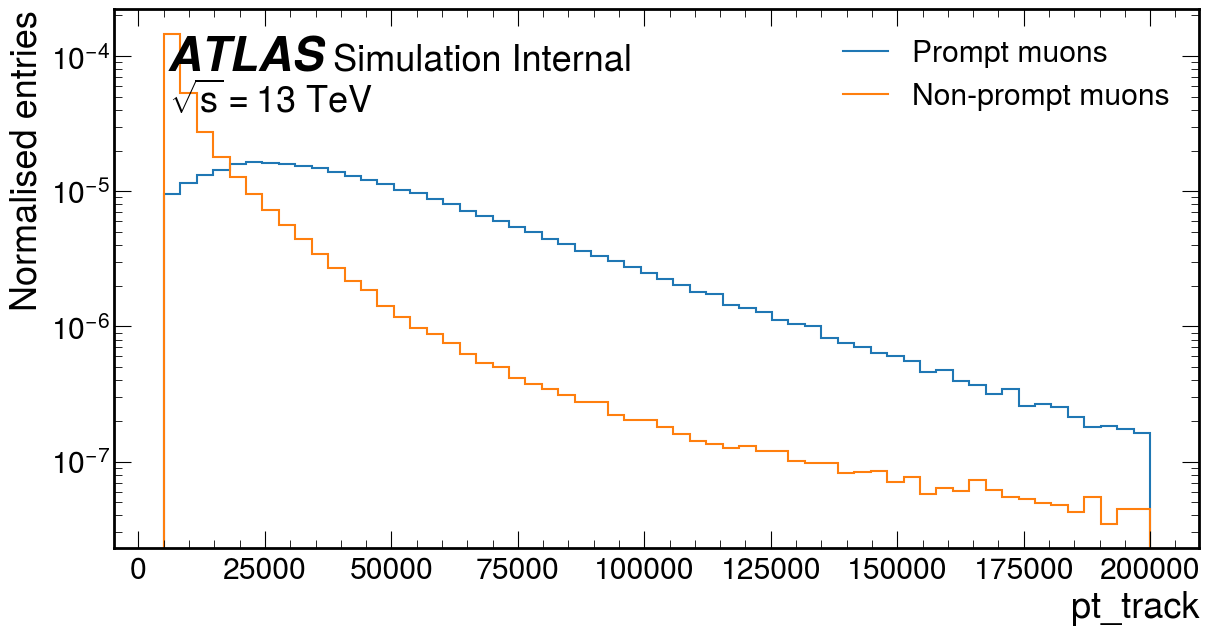

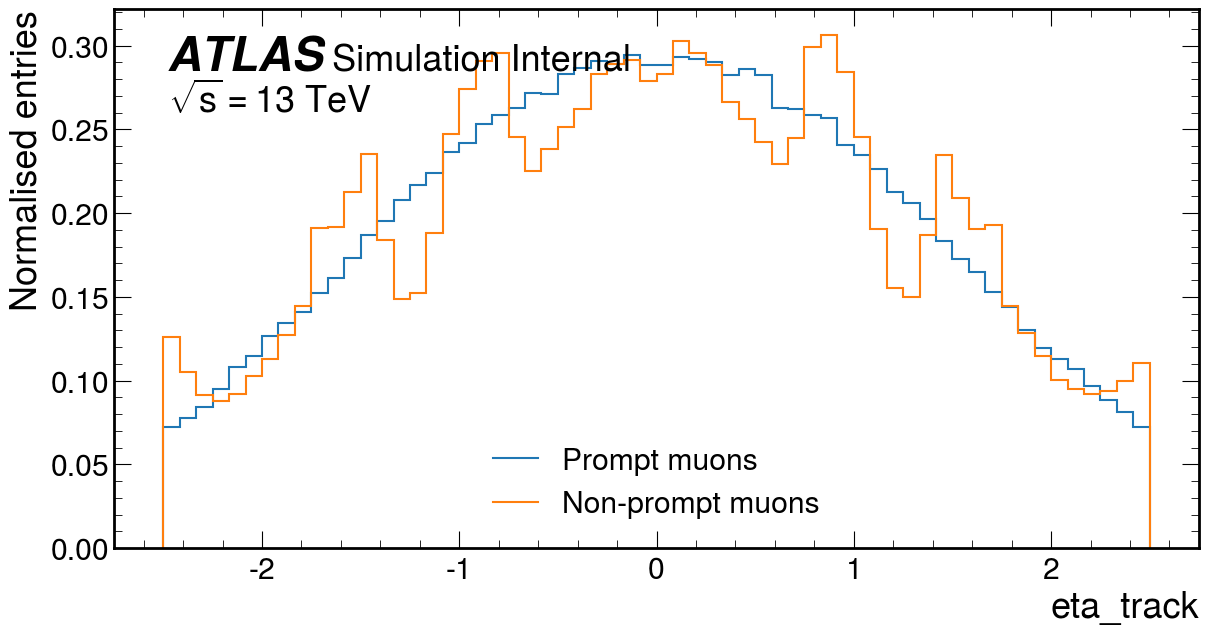

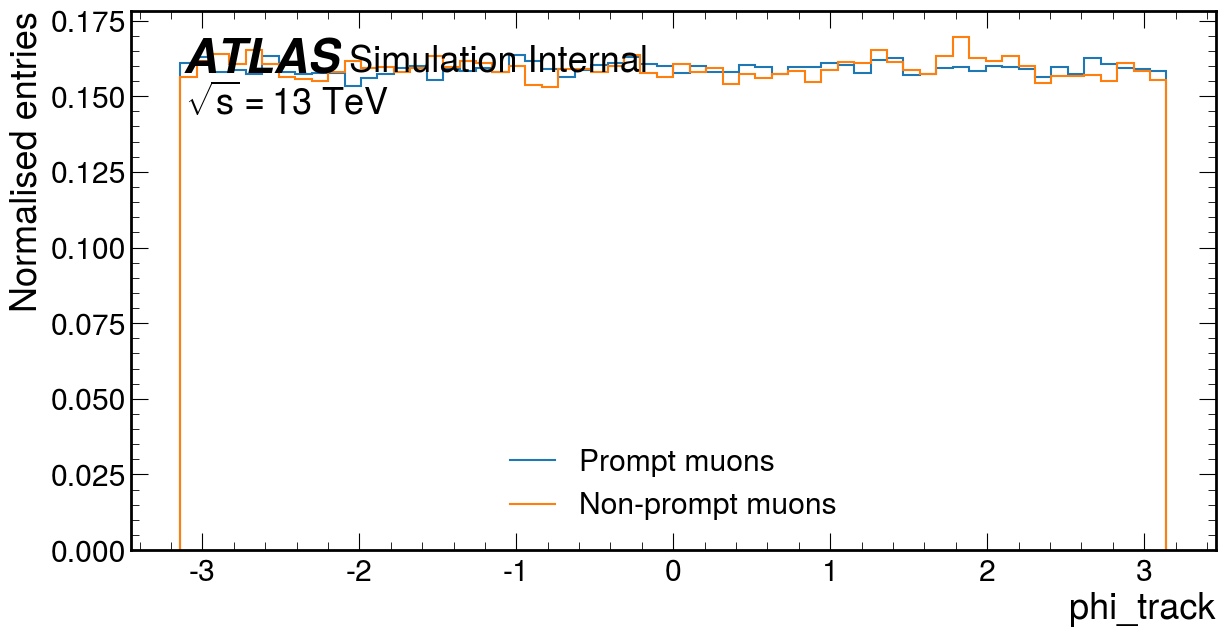

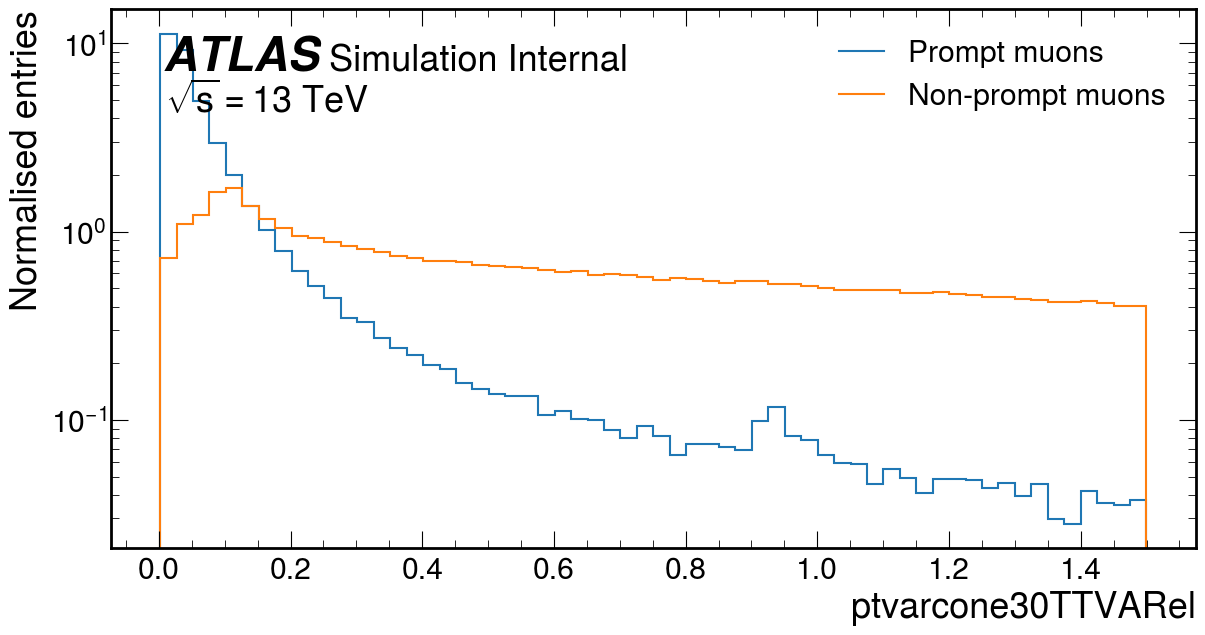

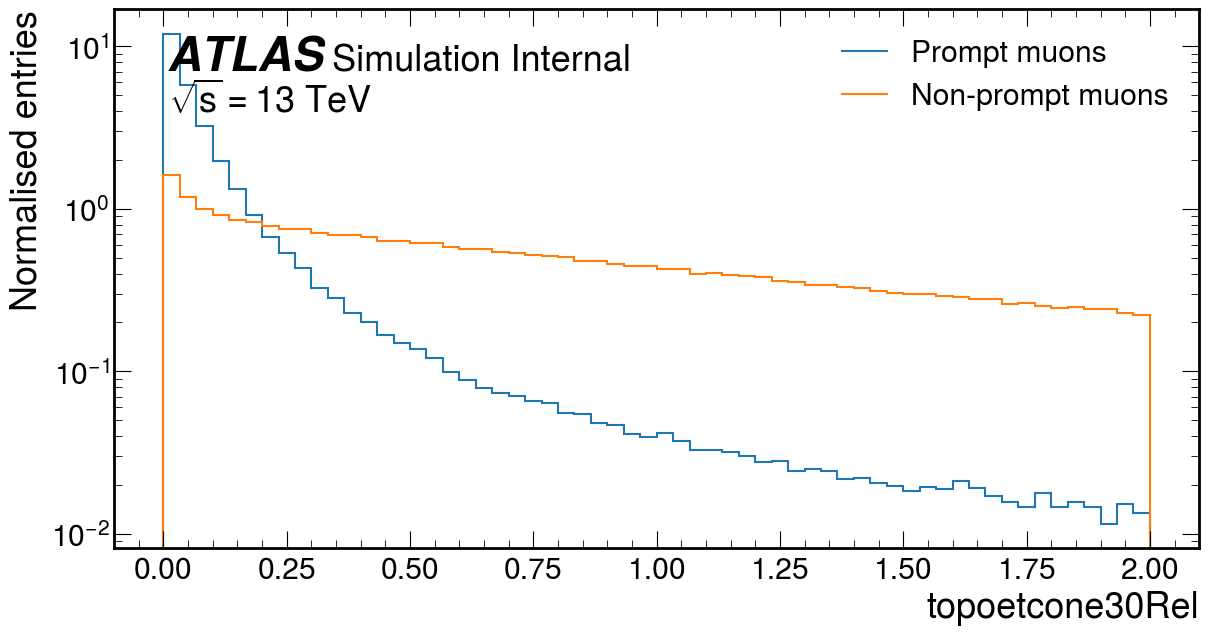

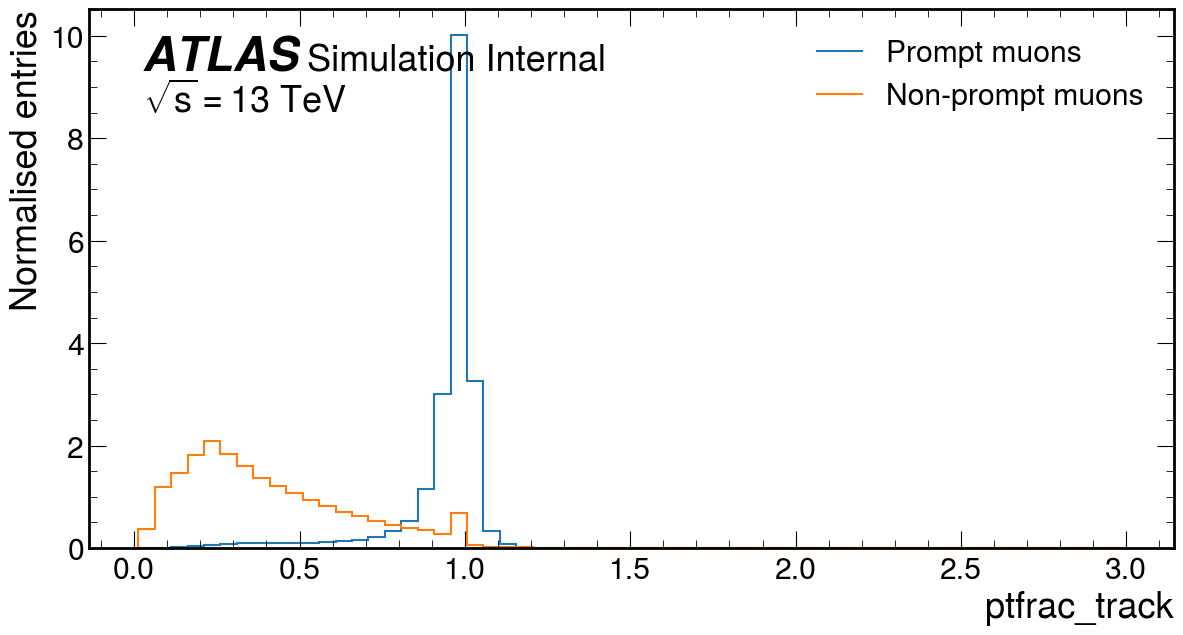

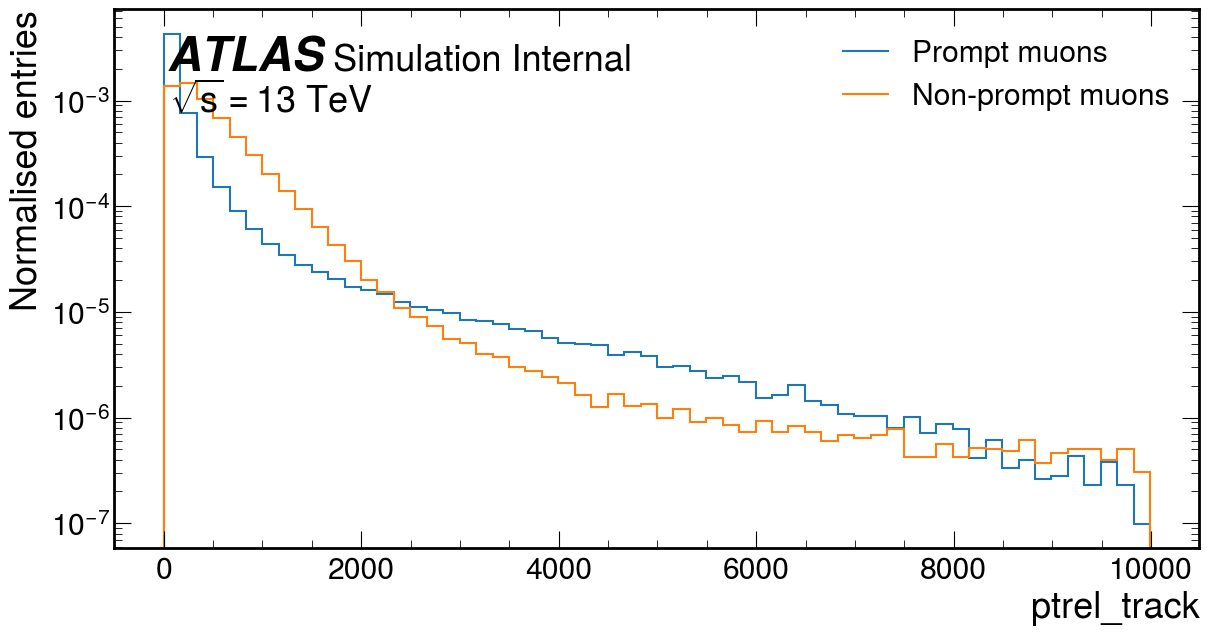

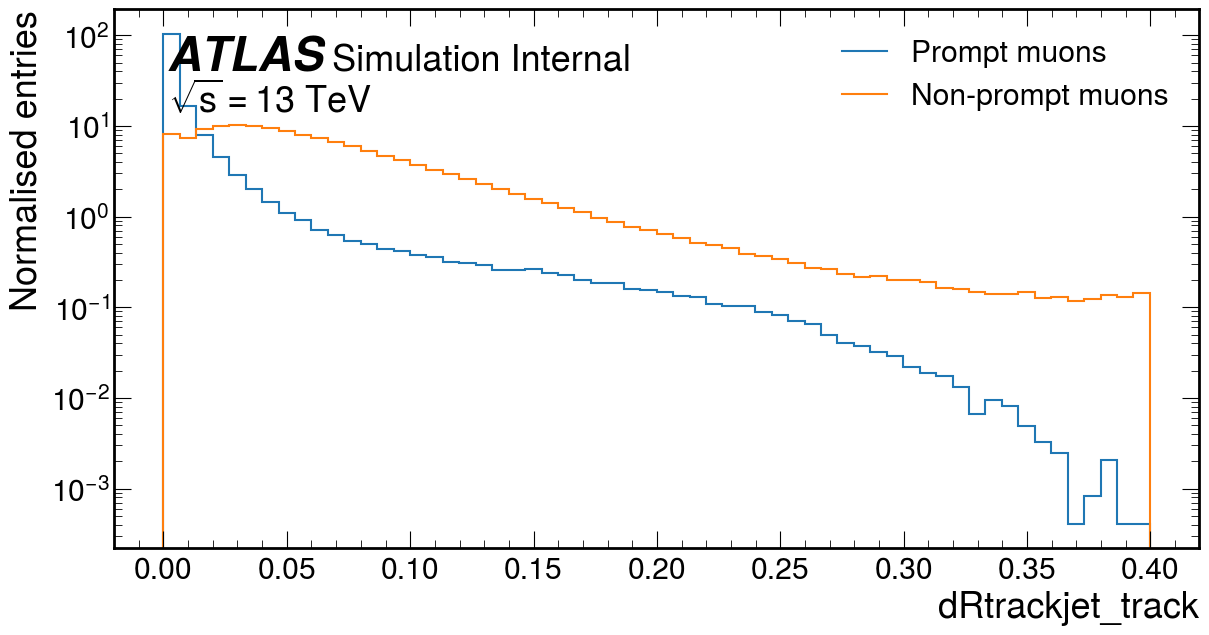

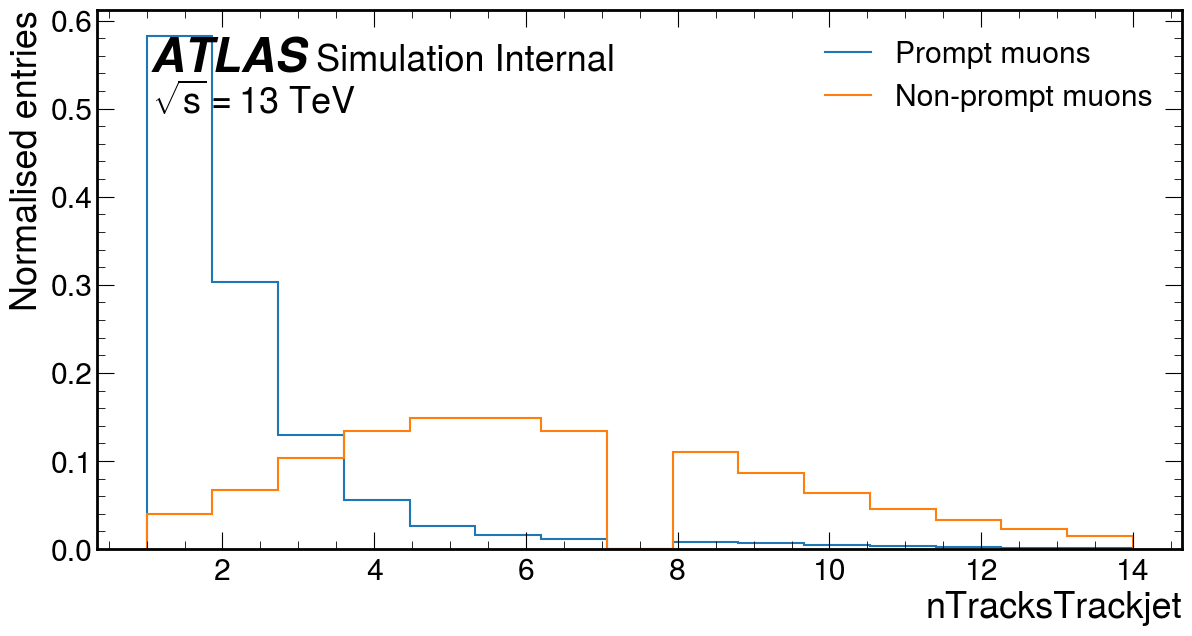

In [7]:
vars = ["pt_track", "eta_track", "phi_track", "ptvarcone30TTVARel", "topoetcone30Rel", "ptfrac_track", "ptrel_track", "dRtrackjet_track", "nTracksTrackjet"]
plotconfigs = {
    "pt_track": {
        "bins": [60, 0, 200_000],
        "logy": True
    },
    "eta_track": {
        "bins": [60, -2.5, 2.5],
        "logy": False
    },
    "phi_track": {
        "bins": [60, -3.2, 3.2],
        "logy": False
    },
    "ptvarcone30TTVARel": {
        "bins": [60, 0, 1.5],
        "logy": True
    },
    "topoetcone30Rel": {
        "bins": [60, 0, 2.0],
        "logy": True
    },
    "ptfrac_track": {
        "bins": [60, 0, 3.0],
        "logy": False
    },
    "ptrel_track": {
        "bins": [60, 0, 10_000],
        "logy": True
    },
    "dRtrackjet_track": {
        "bins": [60, 0, 0.4],
        "logy": True
    },
    "nTracksTrackjet": {
        "bins": [15, 0, 15],
        "logy": False
    },

}
for var in vars:
    plot(df_leptons, var, plotconfigs[var], 'muons')

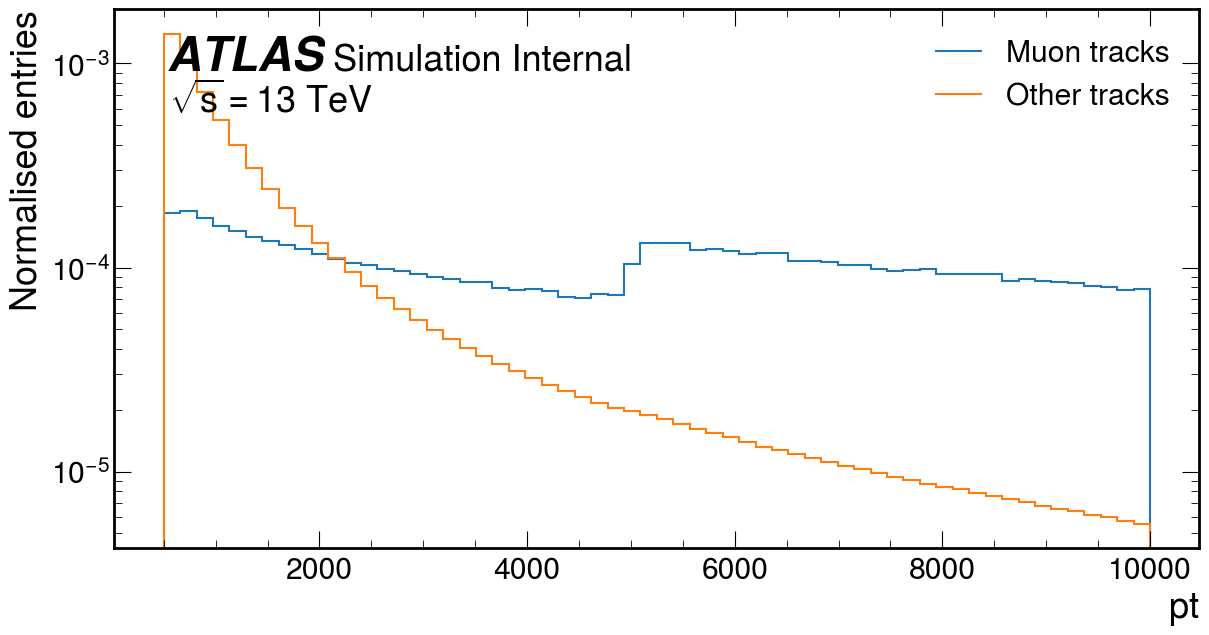

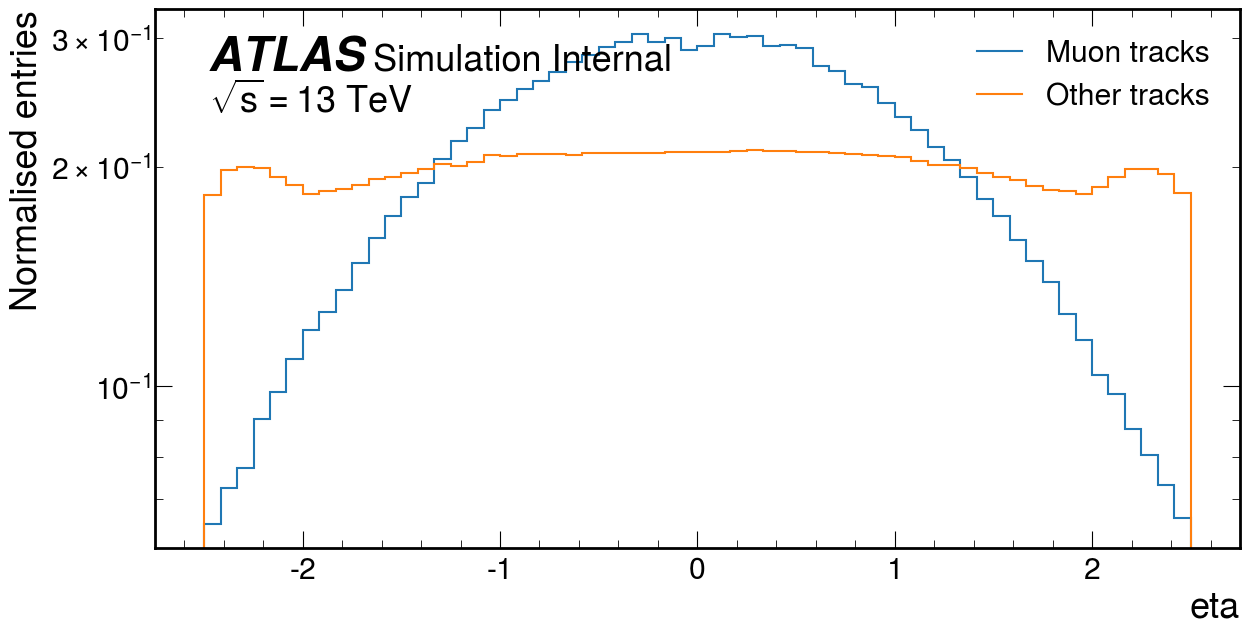

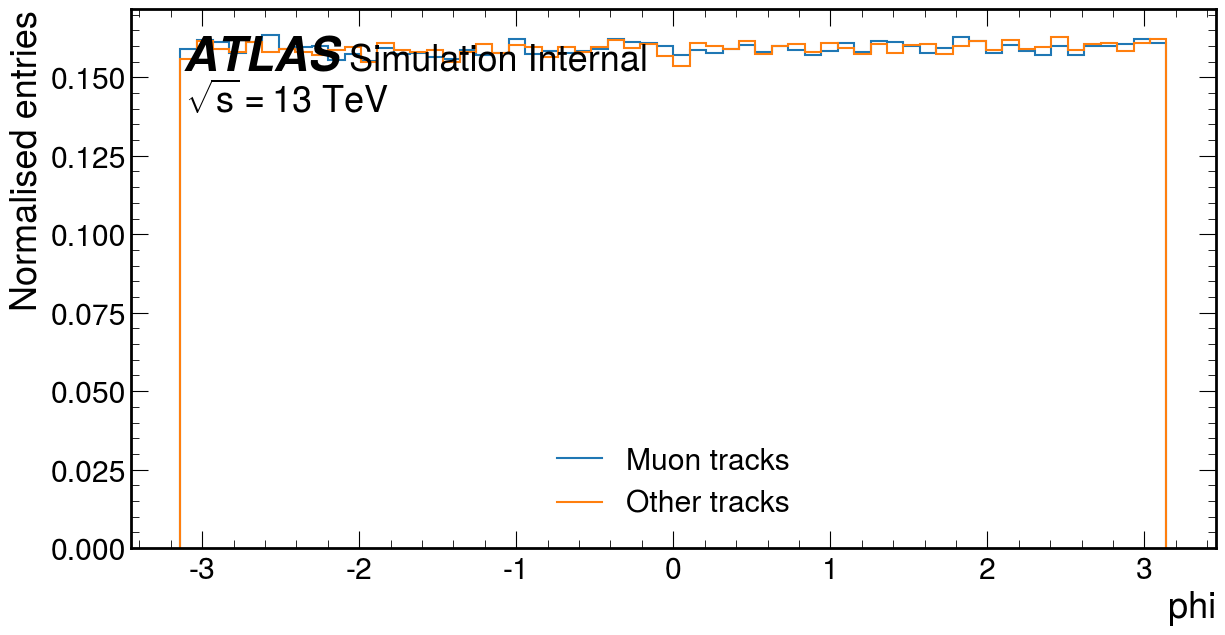

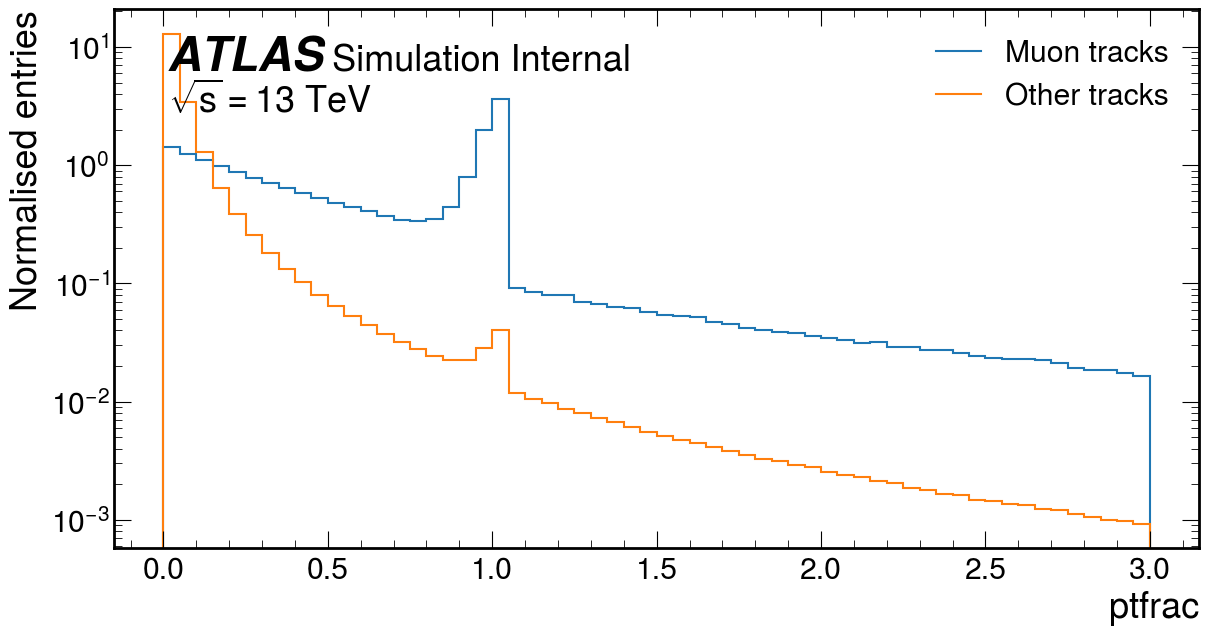

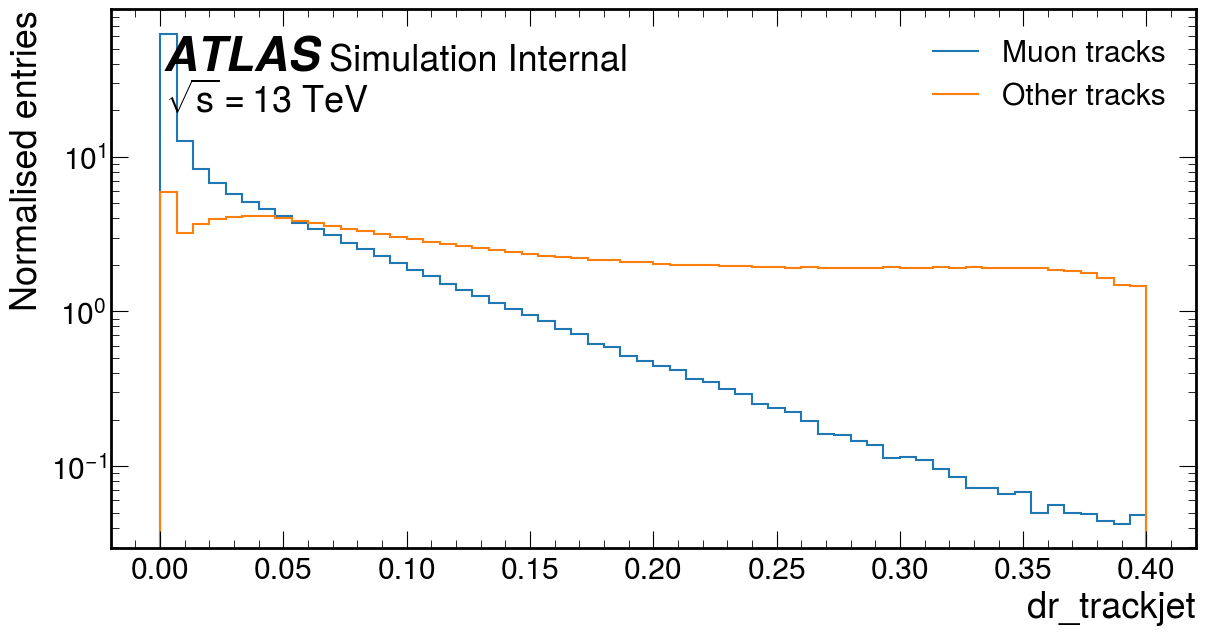

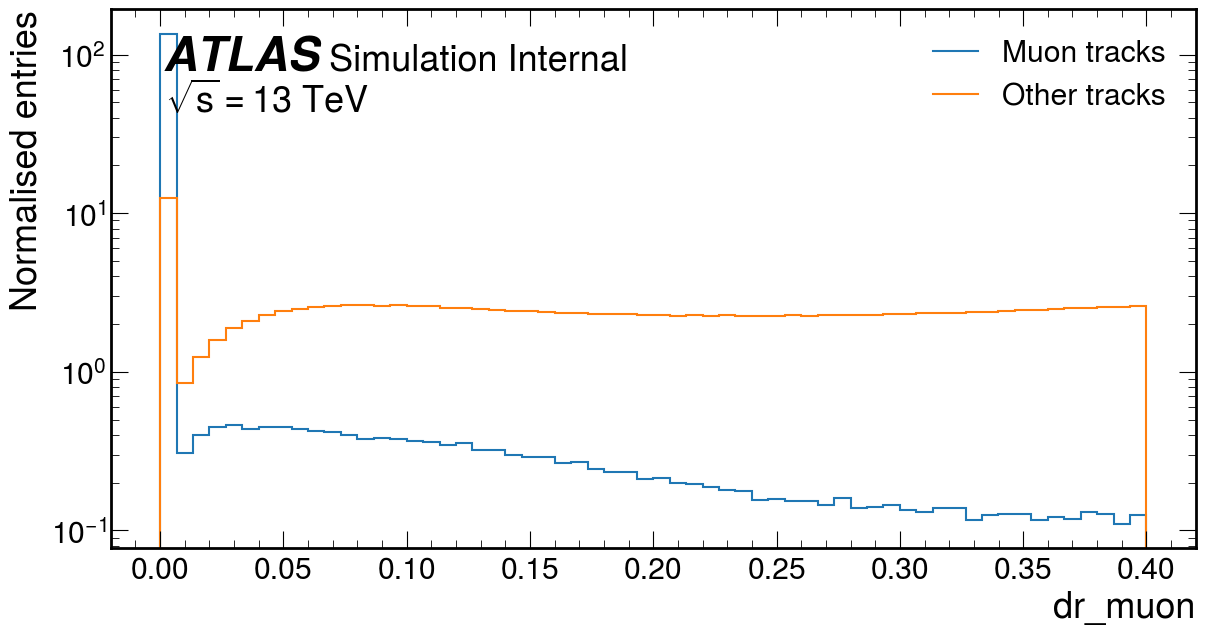

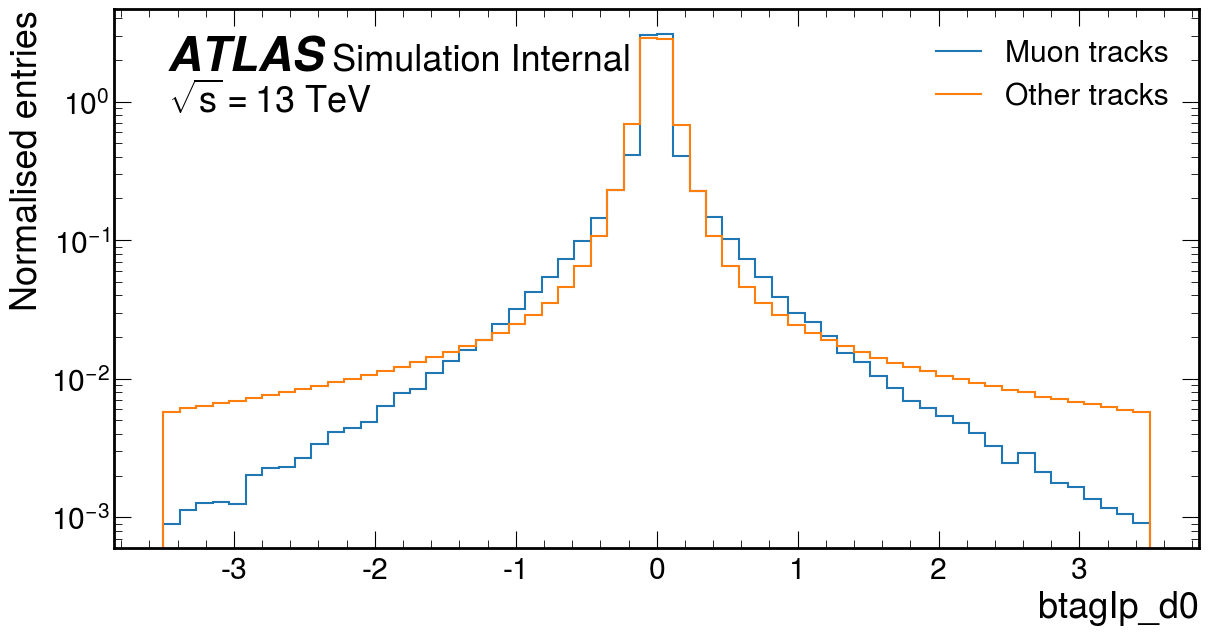

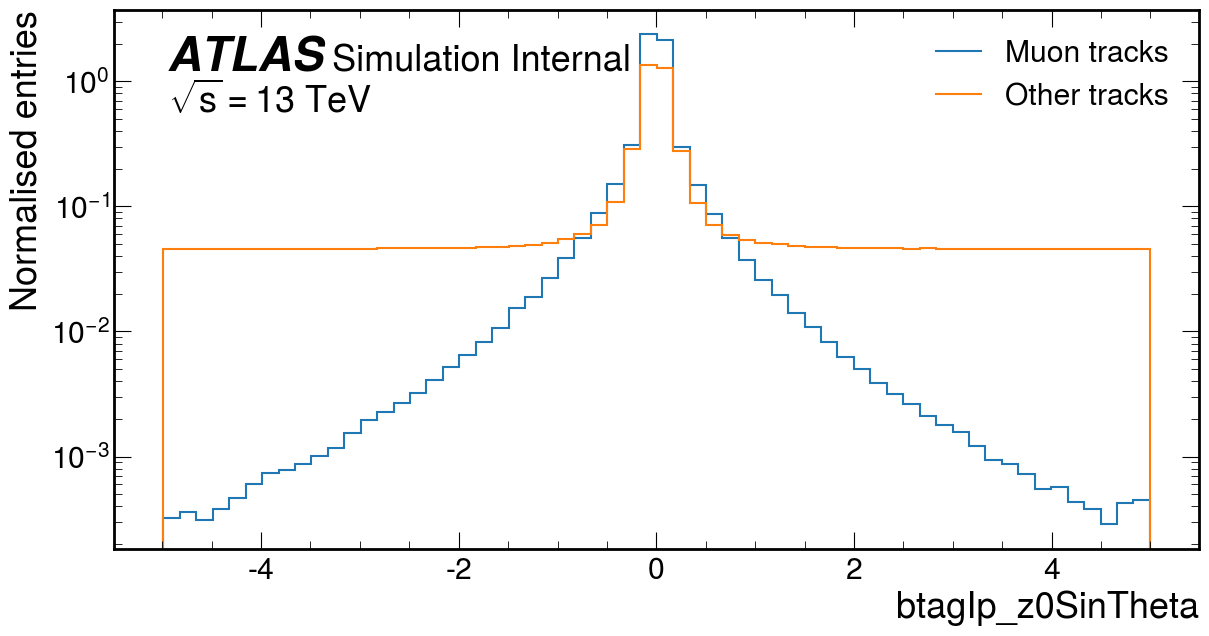

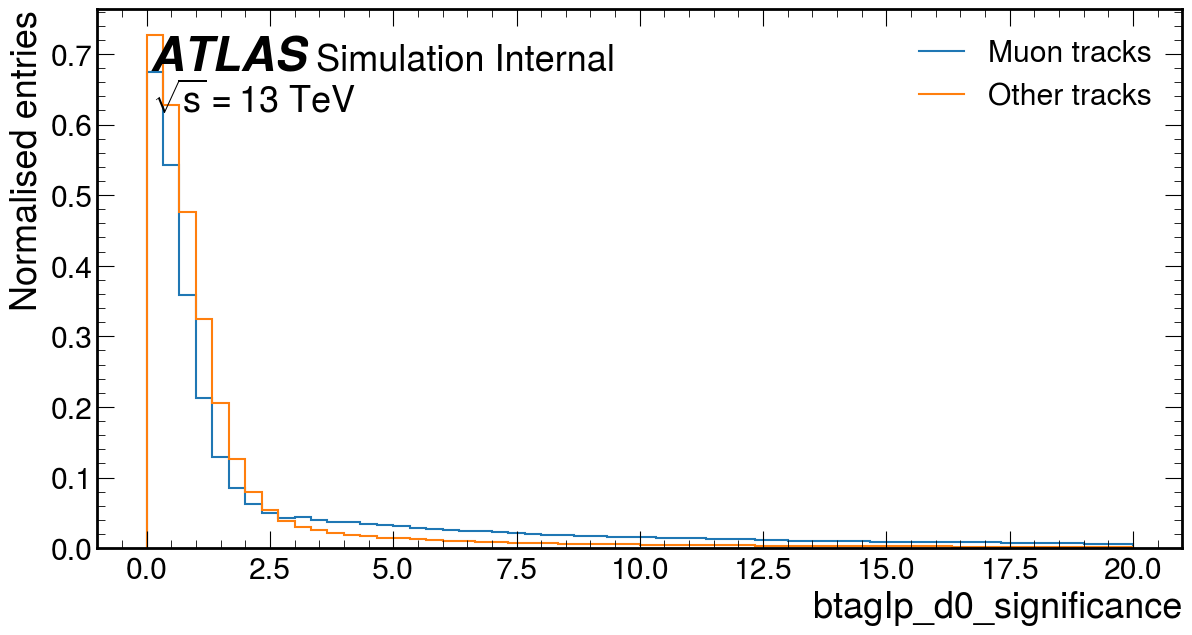

In [8]:
vars = ["pt", "eta", "phi", "ptfrac", "dr_trackjet", "dr_lepton", "btagIp_d0", "btagIp_z0SinTheta", "btagIp_d0_significance"]
plotconfigs = {
    "pt": {
        "bins": [60, 0, 10_000],
        "logy": True
    },
    "eta": {
        "bins": [60, -2.5, 2.5],
        "logy": True
    },
    "phi": {
        "bins": [60, -3.2, 3.2],
        "logy": False
    },
    "ptfrac": {
        "bins": [60, 0, 3.0],
        "logy": True
    },
    "dr_trackjet": {
        "bins": [60, 0, 0.4],
        "logy": True
    },
    "dr_lepton": {
        "bins": [60, 0, 0.4],
        "logy": True
    },
    "btagIp_d0": {
        "bins": [60, -4.0, 4.0],
        "logy": True
    },
    "btagIp_z0SinTheta": {
        "bins": [60, -6.0, 6.0],
        "logy": True
    },
    "btagIp_d0_significance": {
        "bins": [60, 0, 20.0],
        "logy": False
    },
}
for var in vars:
    plot(df_tracks, var, plotconfigs[var], 'muon_tracks')